DISCLARIMER

The idea of these notebooks is not to explain what is in the Bishop or to add anything. It is simply to give a guide so that the reader can replicate the examples and understand in a practical way what he is reading. In any case, over time I will improve them so that they have more and more information and are self-contained. Anyway, it is best to use them as an addition while reading the Bishop.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
font = {'size'   : 15}

plt.rc('font', **font)
def prepare_matrix(x,m):
    A = np.zeros(shape=(N,m))
    for i in range(0,N):
        for j in range(0,m):
            A[i][j]= np.exp(-((x[i]-j/m)**2)/(2*(0.1**2)))
        A[0][j] = 1    
    return A
def plot_fun(x,coeff,m):
    res = []
    for i in range(len(x)):
        val = 0
        for j in range(0,m):
            val+= np.exp(-((x[i]-j/m)**2)/(2*(0.1**2)))*coeff[j]
        res.append(val)
    return res   

N = 25
L = 100
data_set_x = {}
data_set_y = {}
for i in range(0,L):
    obs_x = np.linspace(0,1,N)
    data_set_x[i] = obs_x
    obs_y = np.sin(np.pi*2*obs_x)

    obs_y = np.random.normal(0,0.3,N) + obs_y
    data_set_y[i] = obs_y

In the cell above we have created 100 datasets using the sin function, the same that we did in the regression_curve_fitting_ch1 notebook.

Now we will fit with all the data sets, but changing the regularization parameter λ. The idea is tu illustrate the dependence of bias and variance.  The plots shows the result of fitting the model to the data sets for
various values of ln λ (20 out of 100).  

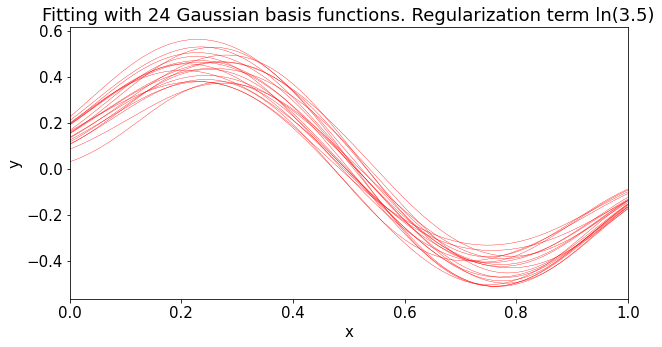

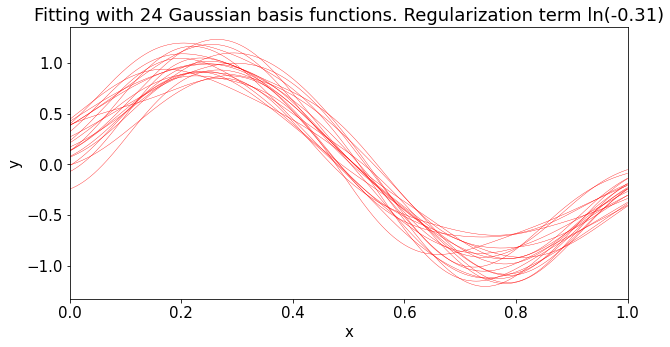

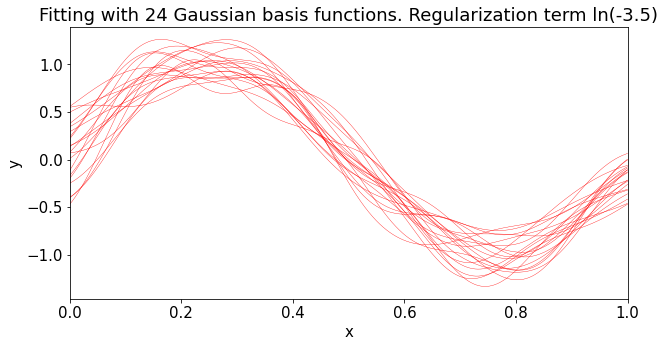

In [11]:
coef_dic_regularized  = {}
values = []
m=25
regs = [np.exp(3.5),np.exp(-0.31),np.exp(-3.5)]
for l in regs:
    reg_lambda = (np.exp(l))
    coef_dic_regularized[l]={}
    plt.figure(figsize=(10,5))
    for i in range(0,L):
            b=data_set_y[i]
            A = prepare_matrix(data_set_x[i],m)
            At=np.transpose(A)
            AtA = np.dot(At,A)
            AtA_inv = np.linalg.inv(np.identity(AtA.shape[0])*l+AtA)
            coeff_fit = np.dot(np.dot(AtA_inv,At),b)
            coef_dic_regularized[l][i]=coeff_fit
            x_fit_regularized = np.linspace(0,1,1000)
            y_fit_regularized = plot_fun(x_fit_regularized,coeff_fit,m)
            if i<20:    
                plt.plot(x_fit_regularized,y_fit_regularized, 'r', linewidth=0.35)
    
    plt.xlim(0,1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Fitting with 24 Gaussian basis functions. Regularization term ln(" +str(round(np.log(l),2))+")")
    plt.show()
    
   
      

Now we will take the average of the 100 fits

In [12]:
avg = {}
for l in regs:
    avg[l] = [0]*m
for l in regs:
    for i in range(0,L):
        for j in range(0,m):
            avg[l][j]= avg[l][j] + coef_dic_regularized[l][i][j]
for l in regs:
    for i in range(0,m):
        avg[l][i]=avg[l][i]/L


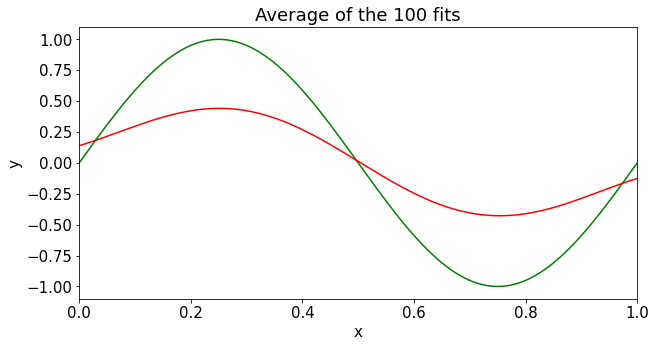

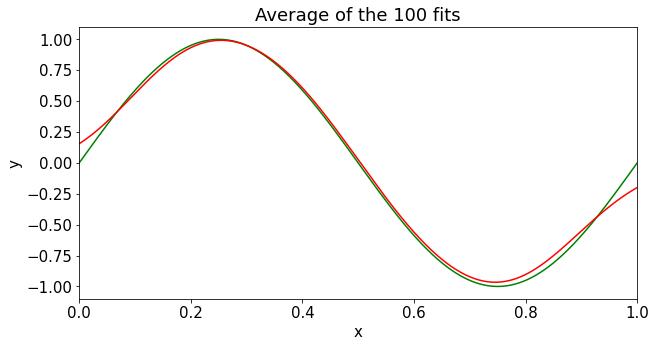

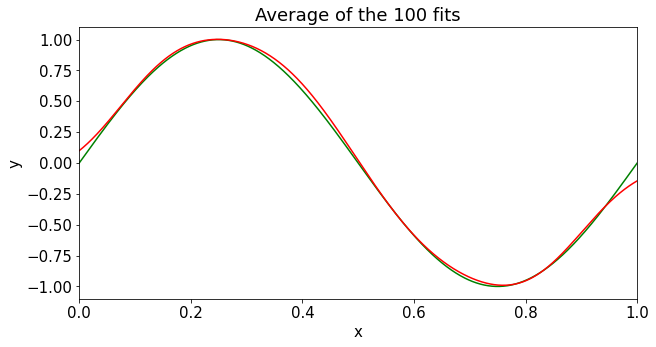

In [13]:
for l in regs:
    # 1000 linearly spaced numbers
    x = np.linspace(0,1,1000)

    # the function, which is y = sin(2*pi*x) here
    y = np.sin(np.pi*2*x)

    # plot the function
    plt.figure(figsize=(10,5))
    plt.plot(x,y, 'g')

    y_fit_regularized = plot_fun(x,avg[l],m)
    
    plt.plot(x,y_fit_regularized, 'r')
    plt.xlim(0,1)
    plt.title("Average of the "+str(L)+" fits")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()